# Using Data Science for comparison between Barcelona and Madrid

## 1. Introduction

Madrid and Barcelona are the 2 largest cities in Spain. While Madrid is the capital of the country and historically is much older, Barcelona grew a lot from the 19th century. Currently, between the two cities there is a great rivalry both politically, economically and sportingly. For this reason, and for being the two cities in which I have lived the longest, I have decided to compare them.


## 2. Problem Definition

Data science has a potential to tell us what people won't be able to notice and what is not written in books or magazines. The aim of this project is to provide new insights to tourists who are interested in Spain or to travel agencies who publish books or provide information on the internet.


## 3. Data Description

As I have said before, Madrid is the capital of Spain. It is known for being the largest city in Spain and the most populated. It is divided into 22 districts. On the other hand, Barcelona is an important merchant port and a great tourist destination. Barcelona is divided into 10 districts. I will use clustering analysis methodology for each district. In addition, below is basic comparison of Madrid and Barcelona, which could complement the results of data analysis (although I won't use these info in Python programming).

||Madrid|Barcelona|
|:-|:-|:-|
|Population|3,223,334|1,620,343|
|Area|604.31km2|101.4km2|
|Population Density|5,300/km2|16,000/km2|
|Districts|21|10|

### 3.1 Data Source
For data source, names of all districs in Madrid and Barcelona are necessary. Below Wikipedia pages provides the data as a table structure. There are so many information and data on these pages but the process for scraping is simplified thanks to Python BeautifulSoup library.

**Madrid city**  
https://en.wikipedia.org/wiki/Madrid
https://en.wikipedia.org/wiki/Districts_of_Madrid

![madrid.png](attachment:500px-Madrid._Distritos.svg.png)

**Barcelona city**  
https://en.wikipedia.org/wiki/Barcelona
https://en.wikipedia.org/wiki/Districts_of_Barcelona

![barcelona.png](attachment:barcelona.png)

### 3.2 Data Processing Libraries
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)  
BeautifulSoup is a Python library for pulling data out of HTML and XML files. In this project, this library is used for scraping district table from Wikipedia website.<P>

* [Geocoding](https://geocoder.readthedocs.io/providers/Google.html)
Geocoding is the process of converting addresses into geographic coordinates of latitude and longitude. In this project, this library is used for converting each district name into latitude and longitude. <P> 

* [Foursquare](https://foursquare.com/)
Foursquare is a technology company that build a massive dataset of accurate location data. Specific type of venues or stores around a given location can be searched by Foursquare API.  

## 4. Methodology
### 4.1 Scrape district data of Madrid and Barcelona
First, import necessary libraries.

In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # general-purpose array-processing package
import requests # elegant and simple HTTP library
from bs4 import BeautifulSoup # library for pulling data out of HTML and XML files

Scrape districts table of Madrid from Wikipedia and create pandas DataFrame. Confirmed **Madrid** DataFrame has 22 districs.

In [2]:
req = requests.get("https://en.wikipedia.org/wiki/Districts_of_Madrid")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[1] # 2nd table describes special wards of Madrid
df = pd.read_html(str(table))
madrid = pd.DataFrame(df[0])
madrid = madrid.iloc[:, 1]
madrid = pd.DataFrame(madrid)
madrid.columns = ['District']
madrid.drop([21] , inplace = True)
print(madrid.shape)
madrid.head()

(21, 1)


,District
0,Centro
1,Arganzuela
2,Retiro
3,Salamanca
4,Chamartín


Scrape districts table of Barcelona from Wikipedia and create pandas DataFrame. Confirmed **Barcelona** DataFrame has 10 districs.

In [3]:
req = requests.get("https://en.wikipedia.org/wiki/Districts_of_Barcelona")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[3]# 4th table describes wards of Barcelona
df = pd.read_html(str(table))
barcelona = pd.DataFrame(df[0])
barcelona = barcelona.iloc[:, 1]
barcelona = pd.DataFrame(barcelona)
barcelona.columns = ['District']
print(barcelona.shape)
barcelona.head()

(10, 1)


,District
0,Ciutat Vella
1,Eixample
2,Sants-Montjuïc
3,Les Corts
4,Sarrià-Sant Gervasi


### 4.2 Get the list of latitude and longitude coordinates of a given district name

Import geocoder to convert district name to latitude and longitude.

In [4]:
!pip install geocoder
import geocoder

You should consider upgrading via the 'c:\users\acasa\anaconda3\python.exe -m pip install --upgrade pip' command.


Get coordinates for each district in Madrid, confirm Madrid DataFrame is updated with latitude and longitude coloumns.

In [5]:
lat_lng_coords = None
lati = []
longti = []
i = 0

# Repeated for each district name in Madrid DataFrame
for dist_name in madrid['District']:
  # Repeated until
  while(lat_lng_coords is None):
    g = geocoder.arcgis('{}, Madrid, Spain'.format(madrid.loc[i, 'District']))
    lat_lng_coords = g.latlng

  #print('District = {0}, Latitude = {1}, Longtitude = {2}'.format(District, lat_lng_coords[0], lat_lng_coords[1]))
  lati.append(lat_lng_coords[0])
  longti.append(lat_lng_coords[1])
  i = i + 1
  lat_lng_coords = None

madrid['Latitude'] = lati
madrid['Longtitude'] = longti
madrid.head()

,District,Latitude,Longtitude
0,Centro,41.62812,-4.72705
1,Arganzuela,40.40021,-3.69618
2,Retiro,40.41317,-3.68307
3,Salamanca,40.42972,-3.67975
4,Chamartín,40.45000,-3.70000


Get coordinates for each district in Barcelona, confirm osaka Barcelona is updated with latitude and longitude coloumns.

In [6]:
lat_lng_coords = None
lati = []
longti = []
i = 0

# Repeated for each district name in Barcelona DataFrame
for dist_name in barcelona['District']:
  while(lat_lng_coords is None):
    g = geocoder.arcgis('{}, Barcelona, Spain'.format(barcelona.loc[i, 'District']))
    lat_lng_coords = g.latlng

  #print('District = {0}, Latitude = {1}, Longtitude = {2}'.format(District, lat_lng_coords[0], lat_lng_coords[1]))
  lati.append(lat_lng_coords[0])
  longti.append(lat_lng_coords[1])
  i = i + 1
  lat_lng_coords = None

barcelona['Latitude'] = lati
barcelona['Longtitude'] = longti
barcelona.head()

,District,Latitude,Longtitude
0,Ciutat Vella,41.380880,2.172230
1,Eixample,41.595120,1.918080
2,Sants-Montjuïc,41.371720,2.151570
3,Les Corts,41.386950,2.136310
4,Sarrià-Sant Gervasi,41.392246,2.132272


### 4.3 Get a map of Madrid & Barcelona and add markers to the map

Import Nominatim and get geograpical coordinate of Special Wards of Madrid and Barcelona. These are used as the center coordinates of Madrid and Barcelona. 

In [7]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('Madrid, Spain')
madrid_latitude = location.latitude
madrid_longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(madrid_latitude, madrid_longitude))
location = geolocator.geocode('Barcelona, Spain')
barcelona_latitude = location.latitude
barcelona_longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(barcelona_latitude, barcelona_longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.
The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


Import folium. Folium is used for visualizing geospatial data.

In [8]:
!pip install folium
import folium

You should consider upgrading via the 'c:\users\acasa\anaconda3\python.exe -m pip install --upgrade pip' command.


Create the map of Madrid/Barcelona and add district marks to it.

In [9]:
madrid_map = folium.Map(location=[madrid_latitude, madrid_longitude], zoom_start=11)

for dist, lat, lng in zip(madrid['District'], madrid['Latitude'], madrid['Longtitude']):
    label = folium.Popup(dist, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(madrid_map)  
    
madrid_map

In [10]:
barcelona_map = folium.Map(location=[barcelona_latitude, barcelona_longitude], zoom_start=10)

for dist, lat, lng in zip(barcelona['District'], barcelona['Latitude'], barcelona['Longtitude']):
    label = folium.Popup(dist, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(barcelona_map)  
    
barcelona_map

### 4.4 Explore each district and get venues information
Use Foursquare API to explore and get venues around districts. First define a function to get nearby venues.

In [11]:
CLIENT_ID = '0I2UNDG5YYTY0JO0UEFL14DTWLVDXYCF0RYGY142WSXZRBEN'
CLIENT_SECRET = 'FLMUUOX25GBPR5Q3QQ2ANXDHCEG5K2CXKA0MZ2PCB3L2XT1Q'
VERSION = '20201211' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

In [12]:
# Function : getNearbyVenues
# name : 
# latitudes : 
# longitudes : 
# radius : 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call getNearbyVenues function and create a new DataFrame **madrid_venue**.

In [13]:
madrid_venues = getNearbyVenues(names=madrid['District'], latitudes=madrid['Latitude'], longitudes=madrid['Longtitude'])
print(madrid_venues.shape)
madrid_venues.head()

Centro
Arganzuela
Retiro
Salamanca
Chamartín
Tetuán
Chamberí
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicálvaro
San Blas-Canillejas
Barajas
(503, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,41.62812,-4.72705,Brasería La Berrea,41.630265,-4.725611,Spanish Restaurant
1,Centro,41.62812,-4.72705,Moby Dick,41.630253,-4.725683,Pub
2,Centro,41.62812,-4.72705,Restaurante La Ola,41.627614,-4.726770,Bar
3,Centro,41.62812,-4.72705,Jardin Botánico Arco de ladrillo,41.629596,-4.727548,Park
4,Centro,41.62812,-4.72705,Berzal bricomaderas,41.626189,-4.731090,Furniture / Home Store


Call getNearbyVenues function and create a new DataFrame **barcelona_venue**.

In [14]:
barcelona_venues = getNearbyVenues(names=barcelona['District'], latitudes=barcelona['Latitude'], longitudes=barcelona['Longtitude'])
print(barcelona_venues.shape)
barcelona_venues.head()

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta-Guinardó
Nou Barris
Sant Andreu
Sant Martí
(623, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,41.38088,2.17223,Cañete,41.379154,2.173092,Tapas Restaurant
1,Ciutat Vella,41.38088,2.17223,Liceu Opera Barcelona (Gran Teatro del Liceo),41.380713,2.173606,Opera House
2,Ciutat Vella,41.38088,2.17223,Mercat de Sant Josep - La Boqueria,41.381959,2.172011,Market
3,Ciutat Vella,41.38088,2.17223,Kӕlderkold,41.381723,2.173348,Beer Bar
4,Ciutat Vella,41.38088,2.17223,La Robadora,41.379500,2.170463,Gastropub


New DataFrame generated by getNearbyVenues function has 7 columns shown above. Foursquare API searches for venues within a radius of 1000 meters from specified district latitude and longitude. Maximum number of venues for one district are limited to 100.

### 4.5 Number of venues for Barcelona and Madrid

In [15]:
madrid_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Arganzuela,51,51,51,51,51,51
Barajas,13,13,13,13,13,13
Carabanchel,11,11,11,11,11,11
Centro,6,6,6,6,6,6
Chamartín,57,57,57,57,57,57
Chamberí,100,100,100,100,100,100
Ciudad Lineal,30,30,30,30,30,30
Hortaleza,15,15,15,15,15,15
Latina,15,15,15,15,15,15


In [16]:
barcelona_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Ciutat Vella,100,100,100,100,100,100
Eixample,3,3,3,3,3,3
Gràcia,55,55,55,55,55,55
Horta-Guinardó,32,32,32,32,32,32
Les Corts,86,86,86,86,86,86
Nou Barris,1,1,1,1,1,1
Sant Andreu,62,62,62,62,62,62
Sant Martí,100,100,100,100,100,100
Sants-Montjuïc,95,95,95,95,95,95


In [17]:
print('Total number of venues in Madrid is', len(madrid_venues))
print('Total number of venues in Barcelona is', len(barcelona_venues))

Total number of venues in Madrid is 503
Total number of venues in Barcelona is 623


The population density ratio between Madrid and Barcelona is 1 : 3 (5,000/km2 : 16,000/km2) whereas the number of venues ratio is 5 : 6 (503 : 623). Moreover, the number of venue is reached the maximum of 100 in some districts in Madrid, which means data shows how Madrid's venues are densed.

## 4.6 Apply one-hot-encode to Venue Category
Venue Category in **madrid_venues** and **barcelona_venues** DataFrame is described as type of strings. These strings should be converted to numerical value as clustering algorithm can't take care of string data.

In [18]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
madrid_onehot['District'] = madrid_venues['District']

# move district column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]
madrid_onehot.head()

,District,Accessories Store,Airport Lounge,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# one hot encoding
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
barcelona_onehot['District'] = barcelona_venues['District']

# move district column to the first column
fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]
barcelona_onehot.head()

,District,Accessories Store,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Theme Park,Toy / Game Store,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Yoga Studio
0,Ciutat Vella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ciutat Vella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ciutat Vella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ciutat Vella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ciutat Vella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create new DataFrame **madrid_grouped** and **barcelona_grouped** which rows are grouped by District and the sum value for each venue is averaged.

In [20]:
madrid_grouped = madrid_onehot.groupby('District').mean().reset_index()
madrid_grouped.head()

,District,Accessories Store,Airport Lounge,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Arganzuela,0.0,0.000000,0.0,0.039216,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.019608,0.019608,0.0,0.0,0.0,0.0,0.0,0.000000
1,Barajas,0.0,0.307692,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Carabanchel,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,Centro,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Chamartín,0.0,0.000000,0.0,0.000000,0.0,0.017544,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017544


In [21]:
barcelona_grouped = barcelona_onehot.groupby('District').mean().reset_index()
barcelona_grouped.head()

,District,Accessories Store,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Theme Park,Toy / Game Store,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Yoga Studio
0,Ciutat Vella,0.000000,0.0,0.0,0.02,0.0,0.010000,0.010000,0.00000,0.0,...,0.02,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.01,0.01
1,Eixample,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,...,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00
2,Gràcia,0.000000,0.0,0.0,0.00,0.0,0.018182,0.036364,0.00000,0.0,...,0.00,0.0,0.000000,0.0,0.018182,0.0,0.000000,0.018182,0.00,0.00
3,Horta-Guinardó,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.03125,0.0,...,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00
4,Les Corts,0.011628,0.0,0.0,0.00,0.0,0.000000,0.011628,0.00000,0.0,...,0.00,0.0,0.011628,0.0,0.000000,0.0,0.011628,0.000000,0.00,0.00


### 4.7 Frequency of appearance of venue categories for Madrid and Barcelona
Let's see top 5 venue categories for each districts.

In [22]:
num_top_venues = 5

for hood in madrid_grouped['District']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0    Tapas Restaurant  0.10
1  Spanish Restaurant  0.08
2          Restaurant  0.06
3       Grocery Store  0.06
4              Bakery  0.06


----Barajas----
                  venue  freq
0        Airport Lounge  0.31
1  Fast Food Restaurant  0.15
2    Spanish Restaurant  0.15
3        Duty-free Shop  0.08
4           Coffee Shop  0.08


----Carabanchel----
                  venue  freq
0           Coffee Shop  0.27
1  Fast Food Restaurant  0.18
2         Grocery Store  0.18
3           Flea Market  0.09
4        Farmers Market  0.09


----Centro----
                    venue  freq
0                     Bar  0.33
1                     Pub  0.17
2                    Park  0.17
3  Furniture / Home Store  0.17
4      Spanish Restaurant  0.17


----Chamartín----
                 venue  freq
0   Spanish Restaurant  0.09
1  Japanese Restaurant  0.05
2               Bakery  0.05
3     Tapas Restaurant  0.04
4      Thai Restaurant  0.04


----Cham

In [23]:
num_top_venues = 5

for hood in barcelona_grouped['District']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ciutat Vella----
                venue  freq
0  Spanish Restaurant  0.10
1    Tapas Restaurant  0.09
2      Ice Cream Shop  0.04
3               Plaza  0.04
4               Hotel  0.04


----Eixample----
                   venue  freq
0            Supermarket  0.33
1              Locksmith  0.33
2             Restaurant  0.33
3      Accessories Store  0.00
4  Performing Arts Venue  0.00


----Gràcia----
                venue  freq
0              Bakery  0.09
1    Tapas Restaurant  0.09
2       Grocery Store  0.07
3  Spanish Restaurant  0.05
4               Diner  0.04


----Horta-Guinardó----
              venue  freq
0             Plaza  0.12
1        Restaurant  0.09
2  Tapas Restaurant  0.09
3               Bar  0.06
4     Grocery Store  0.06


----Les Corts----
                      venue  freq
0                Restaurant  0.12
1        Spanish Restaurant  0.09
2  Mediterranean Restaurant  0.05
3       Japanese Restaurant  0.05
4                    Bakery  0.05


----Nou Barris

Next, combine every venue categories for Madrid and Barcelona then display top 10 categories.

In [24]:
temp = madrid_grouped.iloc[:,1:].sum().sort_values(ascending=False)
temp2 = temp.sum()
madrid_lank = temp.head(10)/temp2
print('-----Madrid-----')
print(madrid_lank)

print('\n-----Barcelona-----')
temp = barcelona_grouped.iloc[:,1:].sum().sort_values(ascending=False)
temp2 = temp.sum()
barcelona_lank = temp.head(10)/temp2
print(barcelona_lank)

-----Madrid-----
Spanish Restaurant      0.095037
Pool                    0.062500
Grocery Store           0.051272
Park                    0.041762
Fast Food Restaurant    0.038107
Restaurant              0.034237
Coffee Shop             0.033347
Supermarket             0.029524
Café                    0.025735
Plaza                   0.025334
dtype: float64

-----Barcelona-----
Bed & Breakfast             0.101000
Restaurant                  0.076038
Supermarket                 0.051047
Spanish Restaurant          0.048512
Tapas Restaurant            0.046643
Mediterranean Restaurant    0.034197
Locksmith                   0.033333
Café                        0.029025
Bar                         0.028343
Plaza                       0.027123
dtype: float64


Use bar graph and plot data.

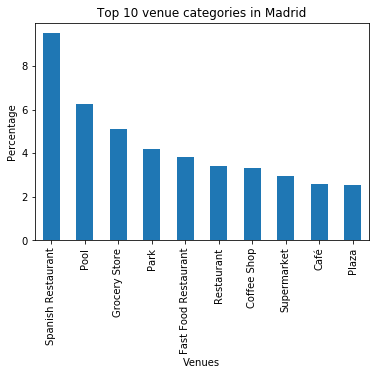

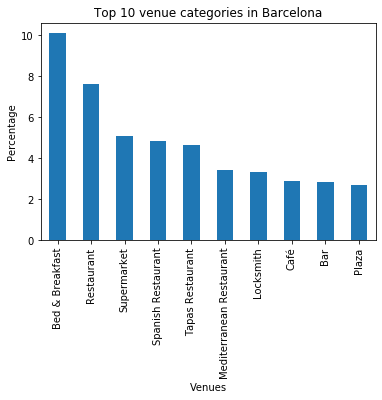

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

madrid_lank = madrid_lank*100
madrid_lank.plot(kind='bar')
plt.title('Top 10 venue categories in Madrid')
plt.xlabel('Venues')
plt.ylabel('Percentage')
plt.show()

barcelona_lank = barcelona_lank*100
barcelona_lank.plot(kind='bar')
plt.title('Top 10 venue categories in Barcelona')
plt.xlabel('Venues')
plt.ylabel('Percentage')
plt.show()

### 4.8 Create a new dataframe which contains top 10 venues categories
Define a function that returns top venues from input DataFrame.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new DataFrame called **madrid_venues_sorted** and **barcelona_venues_sorted** that have top 10 venues.

In [27]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Venue'.format(ind+1))

# create a new dataframe
madrid_venues_sorted = pd.DataFrame(columns=columns)
madrid_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    madrid_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

madrid_venues_sorted.head()

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Arganzuela,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
1,Barajas,Airport Lounge,Spanish Restaurant,Fast Food Restaurant,Sporting Goods Shop,Duty-free Shop,Breakfast Spot,Border Crossing,Coffee Shop,Grocery Store,Gift Shop
2,Carabanchel,Coffee Shop,Fast Food Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Flea Market,Duty-free Shop,Falafel Restaurant,Electronics Store
3,Centro,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
4,Chamartín,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant


In [28]:
# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Venue'.format(ind+1))

# create a new dataframe
barcelona_venues_sorted = pd.DataFrame(columns=columns)
barcelona_venues_sorted['District'] = barcelona_grouped['District']

for ind in np.arange(barcelona_grouped.shape[0]):
    barcelona_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

barcelona_venues_sorted.head()

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Bar,Ice Cream Shop,Plaza,Hotel,Pizza Place,Italian Restaurant,Mediterranean Restaurant,Café
1,Eixample,Supermarket,Restaurant,Locksmith,Yoga Studio,Food & Drink Shop,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Fountain
2,Gràcia,Tapas Restaurant,Bakery,Grocery Store,Spanish Restaurant,Asian Restaurant,Bar,Plaza,Bookstore,Falafel Restaurant,Diner
3,Horta-Guinardó,Plaza,Restaurant,Tapas Restaurant,Grocery Store,Supermarket,Bar,Sandwich Place,Café,Chinese Restaurant,Playground
4,Les Corts,Restaurant,Spanish Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Café,Burger Joint,Sporting Goods Shop,Supermarket,Pizza Place


### 4.9 Run k-means clustering with grouped DataFrame
Set number of clusters to 3, it's appropriate number since the number of districts is only 22 for Madrid and 10 for Barcelona.

In [29]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Create new DataFrame named **madrid_grouped_clustering** and **barcelona_grouped_clustering** which drop District colomn then apply k-means clustering.

In [30]:
madrid_grouped_clustering = madrid_grouped.drop('District', 1)

# run k-means clustering
madrid_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
madrid_kmeans.labels_

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0])

In [31]:
barcelona_grouped_clustering = barcelona_grouped.drop('District', 1)

# run k-means clustering
barcelona_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
barcelona_kmeans.labels_

array([3, 2, 3, 0, 4, 1, 3, 3, 3, 4])

Build final DataFrame.

In [32]:
# Merge Madrid_grouped with Madrid to add latitude/longitude for each neighborhood
madrid_venues_sorted.insert(0, 'Cluster Labels', madrid_kmeans.labels_)
madrid_merged = madrid
madrid_merged = madrid_merged.join(madrid_venues_sorted.set_index('District'), on='District')
madrid_merged.drop([7] , inplace = True)
madrid_merged.head()

,District,Latitude,Longtitude,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Centro,41.62812,-4.72705,3.0,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Arganzuela,40.40021,-3.69618,0.0,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
2,Retiro,40.41317,-3.68307,0.0,Garden,Café,Monument / Landmark,Plaza,Park,Lake,Outdoor Sculpture,Fountain,Snack Place,Paella Restaurant
3,Salamanca,40.42972,-3.67975,0.0,Restaurant,Spanish Restaurant,Boutique,Tapas Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant,Mexican Restaurant,Japanese Restaurant,Cocktail Bar
4,Chamartín,40.45000,-3.70000,0.0,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant


In [33]:
madrid_merged.head(22)

,District,Latitude,Longtitude,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Centro,41.62812,-4.72705,3.0,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Arganzuela,40.40021,-3.69618,0.0,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
2,Retiro,40.41317,-3.68307,0.0,Garden,Café,Monument / Landmark,Plaza,Park,Lake,Outdoor Sculpture,Fountain,Snack Place,Paella Restaurant
3,Salamanca,40.42972,-3.67975,0.0,Restaurant,Spanish Restaurant,Boutique,Tapas Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant,Mexican Restaurant,Japanese Restaurant,Cocktail Bar
4,Chamartín,40.45000,-3.70000,0.0,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant
5,Tetuán,40.46667,-3.71667,4.0,Spanish Restaurant,Park,Supermarket,Metro Station,Asian Restaurant,Soccer Field,Diner,Donut Shop,Department Store,Food
6,Chamberí,40.43404,-3.70379,0.0,Restaurant,Spanish Restaurant,Bar,Tapas Restaurant,Café,Bakery,Brewery,Plaza,Coffee Shop,Mexican Restaurant
8,Moncloa-Aravaca,40.43547,-3.73170,2.0,Pool,Pub,Gym,Spanish Restaurant,Yoga Studio,Duty-free Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
9,Latina,40.38897,-3.74569,0.0,Grocery Store,Fast Food Restaurant,Indie Theater,Bakery,Metro Station,Mobile Phone Shop,Pizza Place,Comedy Club,Coffee Shop,Breakfast Spot
10,Carabanchel,40.39094,-3.72420,0.0,Coffee Shop,Fast Food Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Flea Market,Duty-free Shop,Falafel Restaurant,Electronics Store


In [34]:
# Merge Barcelona_grouped with Barcelona to add latitude/longitude for each neighborhood
barcelona_venues_sorted.insert(0, 'Cluster Labels', barcelona_kmeans.labels_)
barcelona_merged = barcelona
barcelona_merged = barcelona_merged.join(barcelona_venues_sorted.set_index('District'), on='District')
barcelona_merged.head()

,District,Latitude,Longtitude,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Ciutat Vella,41.380880,2.172230,3,Spanish Restaurant,Tapas Restaurant,Bar,Ice Cream Shop,Plaza,Hotel,Pizza Place,Italian Restaurant,Mediterranean Restaurant,Café
1,Eixample,41.595120,1.918080,2,Supermarket,Restaurant,Locksmith,Yoga Studio,Food & Drink Shop,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Fountain
2,Sants-Montjuïc,41.371720,2.151570,3,Spanish Restaurant,Tapas Restaurant,Plaza,Mediterranean Restaurant,Restaurant,Seafood Restaurant,Café,Track,Art Museum,Nightclub
3,Les Corts,41.386950,2.136310,4,Restaurant,Spanish Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Café,Burger Joint,Sporting Goods Shop,Supermarket,Pizza Place
4,Sarrià-Sant Gervasi,41.392246,2.132272,4,Restaurant,Clothing Store,Asian Restaurant,Spanish Restaurant,Burger Joint,Sporting Goods Shop,Japanese Restaurant,Café,Coffee Shop,Mediterranean Restaurant


### 4.10 Create clusters map

In [35]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# create map
madrid_clusters = folium.Map(location=[madrid_latitude, madrid_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longtitude'], madrid_merged['District'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(madrid_clusters)
       
madrid_clusters

In [36]:
# create map
barcelona_clusters = folium.Map(location=[barcelona_latitude, barcelona_longitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Latitude'], barcelona_merged['Longtitude'], barcelona_merged['District'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(barcelona_clusters)
       
barcelona_clusters

### 4.11 Analyze Clusters

In [37]:
# Madrid Cluster 1
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
1,Arganzuela,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
2,Retiro,Garden,Café,Monument / Landmark,Plaza,Park,Lake,Outdoor Sculpture,Fountain,Snack Place,Paella Restaurant
3,Salamanca,Restaurant,Spanish Restaurant,Boutique,Tapas Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant,Mexican Restaurant,Japanese Restaurant,Cocktail Bar
4,Chamartín,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant
6,Chamberí,Restaurant,Spanish Restaurant,Bar,Tapas Restaurant,Café,Bakery,Brewery,Plaza,Coffee Shop,Mexican Restaurant
9,Latina,Grocery Store,Fast Food Restaurant,Indie Theater,Bakery,Metro Station,Mobile Phone Shop,Pizza Place,Comedy Club,Coffee Shop,Breakfast Spot
10,Carabanchel,Coffee Shop,Fast Food Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Flea Market,Duty-free Shop,Falafel Restaurant,Electronics Store
11,Usera,Spanish Restaurant,Clothing Store,Gastropub,Coffee Shop,Beer Garden,Gym,Electronics Store,Plaza,Restaurant,Farmers Market
12,Puente de Vallecas,Pizza Place,Concert Hall,Restaurant,Electronics Store,Soccer Stadium,Brewery,Music Venue,Big Box Store,Supermarket,Rock Club
14,Ciudad Lineal,Restaurant,Spanish Restaurant,Burger Joint,Grocery Store,Pharmacy,Chinese Restaurant,Supermarket,Shopping Mall,Metro Station,Park


In [38]:
# Madrid Cluster 2
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
13,Moratalaz,Pool,Food Court,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Donut Shop,Duty-free Shop,Electronics Store


In [39]:
# Madrid Cluster 3
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
8,Moncloa-Aravaca,Pool,Pub,Gym,Spanish Restaurant,Yoga Studio,Duty-free Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [40]:
# Madrid Cluster 4
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Centro,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


In [41]:
# Madrid Cluster 5
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
5,Tetuán,Spanish Restaurant,Park,Supermarket,Metro Station,Asian Restaurant,Soccer Field,Diner,Donut Shop,Department Store,Food


In [42]:
# Madrid Cluster 6
madrid_merged.loc[madrid_merged['Cluster Labels'] == 5, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue


In [43]:
# Madrid Cluster 7
madrid_merged.loc[madrid_merged['Cluster Labels'] == 6, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue


In [44]:
# Barcelona Cluster 1
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 0, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
6,Horta-Guinardó,Plaza,Restaurant,Tapas Restaurant,Grocery Store,Supermarket,Bar,Sandwich Place,Café,Chinese Restaurant,Playground


In [45]:
# Barcelona Cluster 2
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 1, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
7,Nou Barris,Bed & Breakfast,Yoga Studio,Fountain,Gift Shop,Gay Bar,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Food Court


In [46]:
# Barcelona Cluster 3
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 2, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
1,Eixample,Supermarket,Restaurant,Locksmith,Yoga Studio,Food & Drink Shop,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Fountain


In [47]:
# Barcelona Cluster 4
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 3, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Bar,Ice Cream Shop,Plaza,Hotel,Pizza Place,Italian Restaurant,Mediterranean Restaurant,Café
2,Sants-Montjuïc,Spanish Restaurant,Tapas Restaurant,Plaza,Mediterranean Restaurant,Restaurant,Seafood Restaurant,Café,Track,Art Museum,Nightclub
5,Gràcia,Tapas Restaurant,Bakery,Grocery Store,Spanish Restaurant,Asian Restaurant,Bar,Plaza,Bookstore,Falafel Restaurant,Diner
8,Sant Andreu,Bar,Café,Tapas Restaurant,Mediterranean Restaurant,Park,Spanish Restaurant,Supermarket,Breakfast Spot,Asian Restaurant,Grocery Store
9,Sant Martí,Mediterranean Restaurant,Hotel,Italian Restaurant,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Restaurant,Café,Clothing Store,Bar


In [48]:
# Barcelona Cluster 5
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 4, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
3,Les Corts,Restaurant,Spanish Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Café,Burger Joint,Sporting Goods Shop,Supermarket,Pizza Place
4,Sarrià-Sant Gervasi,Restaurant,Clothing Store,Asian Restaurant,Spanish Restaurant,Burger Joint,Sporting Goods Shop,Japanese Restaurant,Café,Coffee Shop,Mediterranean Restaurant


### 4.12 Run k-means clustering with mixing Madrid and Barcelona DataFrame

In [49]:
# Append Madrid data to Barcelona data
mixed_grouped_clustering = madrid_grouped_clustering.append(barcelona_grouped_clustering)
mixed_grouped_clustering.reset_index(inplace=True, drop=True)
mixed_grouped_clustering.fillna(0, inplace=True)

# run k-means clustering
mixed_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mixed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
mixed_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0])

In [50]:
# Merge madrid_grouped with madrid to add latitude/longitude for each neighborhood
madrid_venues_sorted2 = madrid_venues_sorted.drop('Cluster Labels', axis=1) # Drop old 'Cluster Labels'
madrid_venues_sorted2.insert(0, 'Cluster Labels', mixed_kmeans.labels_[0:20]) # Attach new 'Cluster Labels'
madrid_merged2 = madrid
madrid_merged2 = madrid_merged2.join(madrid_venues_sorted2.set_index('District'), on='District')
madrid_merged2.drop([7] , inplace = True)
madrid_merged2.head(30)

,District,Latitude,Longtitude,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Centro,41.62812,-4.72705,0.0,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Arganzuela,40.40021,-3.69618,0.0,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
2,Retiro,40.41317,-3.68307,0.0,Garden,Café,Monument / Landmark,Plaza,Park,Lake,Outdoor Sculpture,Fountain,Snack Place,Paella Restaurant
3,Salamanca,40.42972,-3.67975,0.0,Restaurant,Spanish Restaurant,Boutique,Tapas Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant,Mexican Restaurant,Japanese Restaurant,Cocktail Bar
4,Chamartín,40.45000,-3.70000,0.0,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant
5,Tetuán,40.46667,-3.71667,0.0,Spanish Restaurant,Park,Supermarket,Metro Station,Asian Restaurant,Soccer Field,Diner,Donut Shop,Department Store,Food
6,Chamberí,40.43404,-3.70379,0.0,Restaurant,Spanish Restaurant,Bar,Tapas Restaurant,Café,Bakery,Brewery,Plaza,Coffee Shop,Mexican Restaurant
8,Moncloa-Aravaca,40.43547,-3.73170,4.0,Pool,Pub,Gym,Spanish Restaurant,Yoga Studio,Duty-free Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
9,Latina,40.38897,-3.74569,0.0,Grocery Store,Fast Food Restaurant,Indie Theater,Bakery,Metro Station,Mobile Phone Shop,Pizza Place,Comedy Club,Coffee Shop,Breakfast Spot
10,Carabanchel,40.39094,-3.72420,0.0,Coffee Shop,Fast Food Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Flea Market,Duty-free Shop,Falafel Restaurant,Electronics Store


In [51]:
# Merge barcelona_grouped with barcelona to add latitude/longitude for each neighborhood
barcelona_venues_sorted2 = barcelona_venues_sorted.drop('Cluster Labels', axis=1) # Drop old 'Cluster Labels'
barcelona_venues_sorted2.insert(0, 'Cluster Labels', mixed_kmeans.labels_[20:30]) # Attach new 'Cluster Labels'
barcelona_merged2 = barcelona
barcelona_merged2 = barcelona_merged2.join(barcelona_venues_sorted2.set_index('District'), on='District')
barcelona_merged2.head()

,District,Latitude,Longtitude,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Ciutat Vella,41.380880,2.172230,0,Spanish Restaurant,Tapas Restaurant,Bar,Ice Cream Shop,Plaza,Hotel,Pizza Place,Italian Restaurant,Mediterranean Restaurant,Café
1,Eixample,41.595120,1.918080,1,Supermarket,Restaurant,Locksmith,Yoga Studio,Food & Drink Shop,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Fountain
2,Sants-Montjuïc,41.371720,2.151570,0,Spanish Restaurant,Tapas Restaurant,Plaza,Mediterranean Restaurant,Restaurant,Seafood Restaurant,Café,Track,Art Museum,Nightclub
3,Les Corts,41.386950,2.136310,0,Restaurant,Spanish Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Café,Burger Joint,Sporting Goods Shop,Supermarket,Pizza Place
4,Sarrià-Sant Gervasi,41.392246,2.132272,0,Restaurant,Clothing Store,Asian Restaurant,Spanish Restaurant,Burger Joint,Sporting Goods Shop,Japanese Restaurant,Café,Coffee Shop,Mediterranean Restaurant


### 4.13 Create clusters map for mixed k-means

In [52]:
# create map
madrid_clusters = folium.Map(location=[madrid_latitude, madrid_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged2['Latitude'], madrid_merged2['Longtitude'], madrid_merged2['District'], madrid_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(madrid_clusters)
       
madrid_clusters

In [53]:
# create map
barcelona_clusters = folium.Map(location=[barcelona_latitude, barcelona_longitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged2['Latitude'], barcelona_merged2['Longtitude'], barcelona_merged2['District'], barcelona_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(barcelona_clusters)

barcelona_clusters

### 4.14 Analyze Clusters

In [54]:
# Madrid Cluster 1
madrid_merged2.loc[madrid_merged2['Cluster Labels'] == 0, madrid_merged2.columns[[0] + list(range(4, madrid_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Centro,Bar,Spanish Restaurant,Pub,Park,Furniture / Home Store,Falafel Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Arganzuela,Tapas Restaurant,Spanish Restaurant,Bakery,Grocery Store,Restaurant,Chinese Restaurant,Arepa Restaurant,Gym / Fitness Center,Beer Garden,Falafel Restaurant
2,Retiro,Garden,Café,Monument / Landmark,Plaza,Park,Lake,Outdoor Sculpture,Fountain,Snack Place,Paella Restaurant
3,Salamanca,Restaurant,Spanish Restaurant,Boutique,Tapas Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant,Mexican Restaurant,Japanese Restaurant,Cocktail Bar
4,Chamartín,Spanish Restaurant,Japanese Restaurant,Bakery,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Pizza Place,Furniture / Home Store,Clothing Store,Thai Restaurant
5,Tetuán,Spanish Restaurant,Park,Supermarket,Metro Station,Asian Restaurant,Soccer Field,Diner,Donut Shop,Department Store,Food
6,Chamberí,Restaurant,Spanish Restaurant,Bar,Tapas Restaurant,Café,Bakery,Brewery,Plaza,Coffee Shop,Mexican Restaurant
9,Latina,Grocery Store,Fast Food Restaurant,Indie Theater,Bakery,Metro Station,Mobile Phone Shop,Pizza Place,Comedy Club,Coffee Shop,Breakfast Spot
10,Carabanchel,Coffee Shop,Fast Food Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Flea Market,Duty-free Shop,Falafel Restaurant,Electronics Store
11,Usera,Spanish Restaurant,Clothing Store,Gastropub,Coffee Shop,Beer Garden,Gym,Electronics Store,Plaza,Restaurant,Farmers Market


In [55]:
# Barcelona Cluster 1
barcelona_merged2.loc[barcelona_merged2['Cluster Labels'] == 0, barcelona_merged2.columns[[0] + list(range(4, barcelona_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Bar,Ice Cream Shop,Plaza,Hotel,Pizza Place,Italian Restaurant,Mediterranean Restaurant,Café
2,Sants-Montjuïc,Spanish Restaurant,Tapas Restaurant,Plaza,Mediterranean Restaurant,Restaurant,Seafood Restaurant,Café,Track,Art Museum,Nightclub
3,Les Corts,Restaurant,Spanish Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Café,Burger Joint,Sporting Goods Shop,Supermarket,Pizza Place
4,Sarrià-Sant Gervasi,Restaurant,Clothing Store,Asian Restaurant,Spanish Restaurant,Burger Joint,Sporting Goods Shop,Japanese Restaurant,Café,Coffee Shop,Mediterranean Restaurant
5,Gràcia,Tapas Restaurant,Bakery,Grocery Store,Spanish Restaurant,Asian Restaurant,Bar,Plaza,Bookstore,Falafel Restaurant,Diner
6,Horta-Guinardó,Plaza,Restaurant,Tapas Restaurant,Grocery Store,Supermarket,Bar,Sandwich Place,Café,Chinese Restaurant,Playground
8,Sant Andreu,Bar,Café,Tapas Restaurant,Mediterranean Restaurant,Park,Spanish Restaurant,Supermarket,Breakfast Spot,Asian Restaurant,Grocery Store
9,Sant Martí,Mediterranean Restaurant,Hotel,Italian Restaurant,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Restaurant,Café,Clothing Store,Bar


In [56]:
# Madrid Cluster 2
madrid_merged2.loc[madrid_merged2['Cluster Labels'] == 1, madrid_merged2.columns[[0] + list(range(4, madrid_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue


In [57]:
# Barcelona Cluster 2
barcelona_merged2.loc[barcelona_merged2['Cluster Labels'] == 1, barcelona_merged2.columns[[0] + list(range(4, barcelona_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
1,Eixample,Supermarket,Restaurant,Locksmith,Yoga Studio,Food & Drink Shop,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Fountain


In [58]:
# Madrid Cluster 3
madrid_merged2.loc[madrid_merged2['Cluster Labels'] == 2, madrid_merged2.columns[[0] + list(range(4, madrid_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue


In [59]:
# Barcelona Cluster 3
barcelona_merged2.loc[barcelona_merged2['Cluster Labels'] == 2, barcelona_merged2.columns[[0] + list(range(4, barcelona_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
7,Nou Barris,Bed & Breakfast,Yoga Studio,Fountain,Gift Shop,Gay Bar,Gastropub,Garden,Furniture / Home Store,Fried Chicken Joint,Food Court


In [60]:
# Madrid Cluster 4
madrid_merged2.loc[madrid_merged2['Cluster Labels'] == 3, madrid_merged2.columns[[0] + list(range(4, madrid_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
13,Moratalaz,Pool,Food Court,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Donut Shop,Duty-free Shop,Electronics Store


In [61]:
# Barcelona Cluster 4
barcelona_merged2.loc[barcelona_merged2['Cluster Labels'] == 3, barcelona_merged2.columns[[0] + list(range(4, barcelona_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue


In [62]:
# Madrid Cluster 5
madrid_merged2.loc[madrid_merged2['Cluster Labels'] == 4, madrid_merged2.columns[[0] + list(range(4, madrid_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
8,Moncloa-Aravaca,Pool,Pub,Gym,Spanish Restaurant,Yoga Studio,Duty-free Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [63]:
# Barcelona Cluster 5
barcelona_merged2.loc[barcelona_merged2['Cluster Labels'] == 4, barcelona_merged2.columns[[0] + list(range(4, barcelona_merged2.shape[1]))]]

,District,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
